# <h1 style="text-align:center;"> Image Classification (multiclass with 4 classes) Project</h1>

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
training_set = train_datagen.flow_from_directory('DSP Project/training_set', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 6, class_mode = 'categorical')

Found 96 images belonging to 4 classes.


In [6]:
valid_set = test_datagen.flow_from_directory('DSP Project/test_set', # relative path from working directoy
                                             target_size = (128, 128), 
                                             batch_size = 3, class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 40,
                         epochs = 5,
                         validation_data = valid_set,
                         validation_steps = 10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
40/40 [==============================] - 78s 2s/step - loss: 1.2971 - accuracy: 0.4375 - val_loss: 1.5177 - val_accuracy: 0.2667
Epoch 2/5
40/40 [==============================] - 84s 2s/step - loss: 1.0983 - accuracy: 0.4667 - val_loss: 2.0988 - val_accuracy: 0.4000
Epoch 3/5
40/40 [==============================] - 68s 2s/step - loss: 0.9134 - accuracy: 0.5583 - val_loss: 1.7116 - val_accuracy: 0.4000
Epoch 4/5
40/40 [==============================] - 64s 2s/step - loss: 0.7049 - accuracy: 0.7083 - val_loss: 2.5600 - val_accuracy: 0.4667
Epoch 5/5
40/40 [==============================] - 68s 2s/step - loss: 0.5854 - accuracy: 0.7500 - val_loss: 1.3046 - val_accuracy: 0.5000


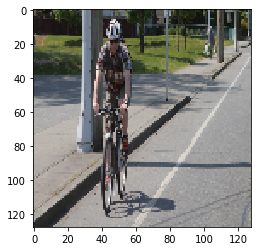

In [46]:
#Predict a single image
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('DSP Project/validation_Set/predict/CY1.JPG')
img_resize = cv2.resize(img, (128,128))


#CV2 reads an image in BGR format. We need to convert it to RGB
b,g,r = cv2.split(img_resize)       # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb


plt.imshow(rgb_img)

In [47]:

img_rank4 = np.expand_dims(rgb_img/255, axis=0)

classifier.predict(img_rank4)

array([[0.00055378, 0.05296625, 0.05433852, 0.01769679]], dtype=float32)

In [48]:
classifier.predict_classes(img_rank4)

array([2], dtype=int64)

In [40]:
label_map = (training_set.class_indices)

label_map

{'Buses': 0, 'Cars': 1, 'Cyclist': 2, 'Trucks': 3}

In [49]:
list(label_map.keys())[classifier.predict_classes(img_rank4)[0]]

'Cyclist'